In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random


In [3]:
print(tf.__version__)

2.1.0


In [4]:
das=tf.keras.datasets.mnist

In [10]:
(x_train,y_train),(x_test,y_test)=das.load_data()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [15]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


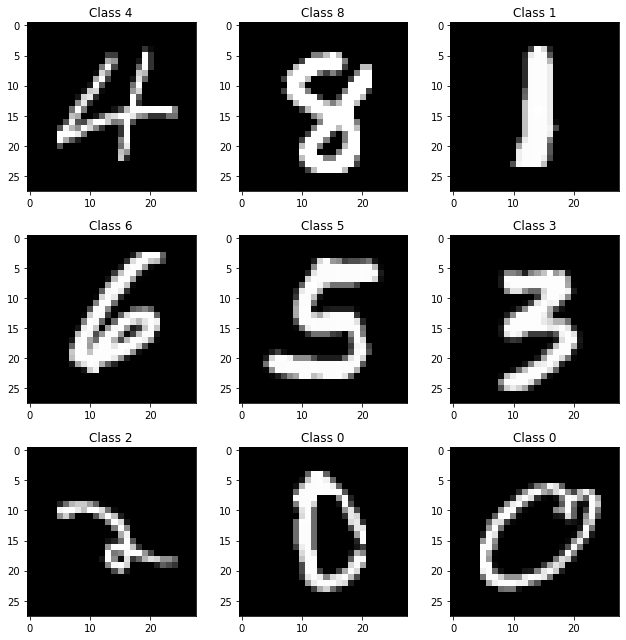

In [21]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

In [22]:
len(x_train)

60000

In [24]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(x_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0   34  118  148  248  224  100    0    0    0    0    0    0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0   38  151  245  253  170  142  219  251  143   69  188  241  168    0  0  0  0  


In [26]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


AttributeError: module 'tensorflow_core.keras.utils' has no attribute 'np_utils'

In [31]:
from keras.utils import np_utils

Using TensorFlow backend.


In [32]:
nb_classes=10
Y_train=np_utils.to_categorical(y_train,nb_classes)
Y_test=np_utils.to_categorical(y_test,nb_classes)

In [33]:

from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation

In [34]:
model=Sequential()

In [35]:
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

## 2nd hidden layer

In [36]:
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
# Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dropout(0.2))

In [37]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [40]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

## training a model

In [41]:
model.fit(x_train,Y_train,epochs=5,batch_size=128,verbose=1)

Epoch 1/5
  256/60000 [..............................] - ETA: 1:21:53 - loss: 2.2806 - accuracy: 0.1758

C:\Users\Akhil\.conda\envs\tfp3.6\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.376450). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


60000/60000 [==============================] - 337s 6ms/step - loss: 0.2530 - accuracy: 0.92427s - loss: 0.255
Epoch 2/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.1031 - accuracy: 0.9685
Epoch 3/5
60000/60000 [==============================] - 17s 282us/step - loss: 0.0715 - accuracy: 0.9779
Epoch 4/5
60000/60000 [==============================] - 17s 287us/step - loss: 0.0548 - accuracy: 0.9823
Epoch 5/5
60000/60000 [==============================] - 18s 292us/step - loss: 0.0486 - accuracy: 0.9841


In [42]:
score=model.evaluate(x_test,Y_test)
print(score)

10000/10000 [==============================] - 15s 2ms/step
[0.05945013181218528, 0.9815000295639038]


In [43]:
print("test_score is {}".format(score[0]))
print("accuracy score is {}".format(score[1]))

test_score is 0.05945013181218528
accuracy score is 0.9815000295639038


In [45]:
predicted= model.predict_classes(x_test)

correct_indices = np.nonzero(predicted == y_test)[0]

incorrect_indices = np.nonzero(predicted != y_test)[0]

In [46]:
print(correct_indices)

[   0    1    2 ... 9997 9998 9999]


In [47]:
print(incorrect_indices)

[  61  149  217  247  259  321  340  445  448  495  582  619  720  846
  900  947  951  956  965 1014 1039 1112 1181 1226 1242 1247 1260 1319
 1328 1393 1414 1500 1522 1530 1549 1609 1681 1709 1717 1754 1878 1901
 1982 1984 2004 2016 2018 2024 2043 2053 2070 2098 2109 2118 2130 2135
 2182 2272 2293 2369 2387 2406 2414 2488 2597 2607 2618 2648 2654 2863
 2877 2896 2921 2927 2939 2953 3030 3073 3117 3172 3225 3289 3422 3503
 3520 3549 3558 3597 3604 3662 3749 3780 3796 3808 3838 3853 3893 3906
 3926 3941 3943 3968 3976 4000 4075 4078 4163 4176 4199 4211 4248 4259
 4289 4294 4425 4497 4536 4571 4635 4639 4690 4731 4807 4823 4838 4879
 4880 4890 4966 5046 5140 5246 5331 5457 5600 5642 5676 5734 5887 5937
 5955 5972 5973 6035 6555 6571 6574 6597 6651 6755 6783 6847 7800 7812
 7821 7849 7921 8198 8246 8325 8408 8522 8527 9009 9015 9019 9024 9280
 9587 9634 9642 9664 9669 9729 9745 9768 9770 9779 9782 9793 9808 9839
 9858 9888 9980]


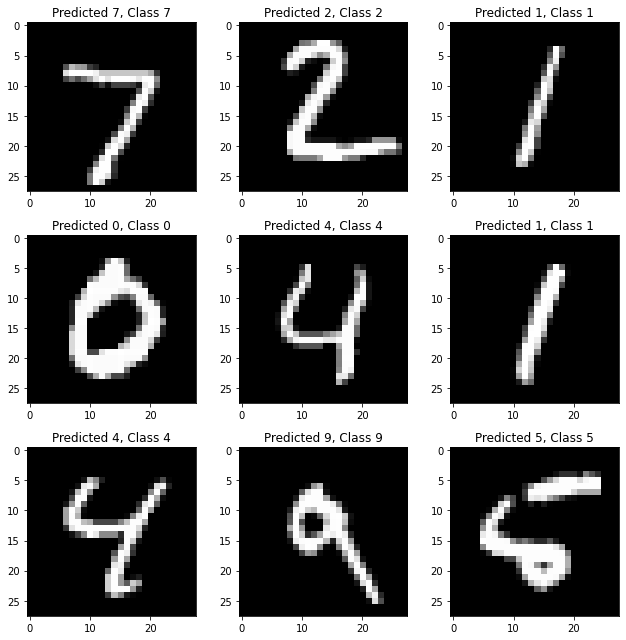

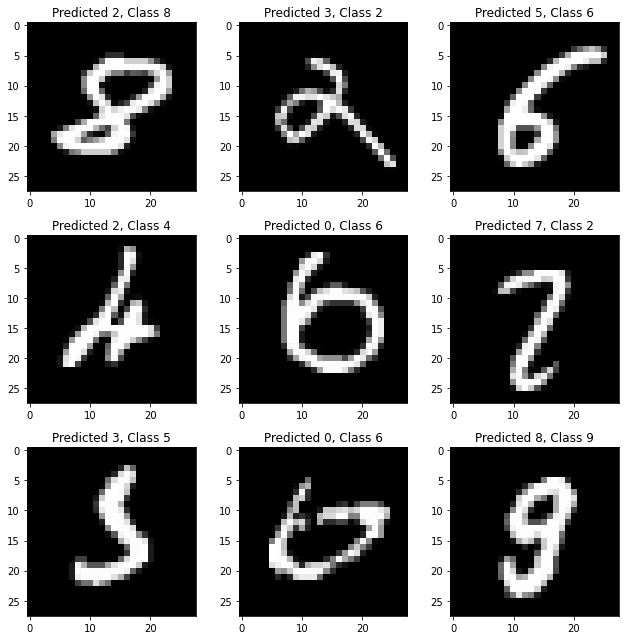

In [53]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted[incorrect], y_test[incorrect]))
    
plt.tight_layout()